In [4]:
library("jsonlite")
library(tidyverse)
library(purrr)
library(glue)
library(rvest)
library(stringr)

# Web scraping #

In [5]:
json_file <- 'https://datahub.io/core/population/datapackage.json'
json_data <- fromJSON(paste(readLines(json_file), collapse = ""))

# get list of all resources:
print(json_data$resources$name)

# print all tabular data(if exists any)
for (i in 1:length(json_data$resources$datahub$type)) {
  if (json_data$resources$datahub$type[i] == 'derived/csv') {
    path_to_file = json_data$resources$path[i]
    data <- read.csv(url(path_to_file))
  }
}

data %>% write_csv("Population.csv")

Warning message in readLines(json_file):
“incomplete final line found on 'https://datahub.io/core/population/datapackage.json'”

[1] "validation_report"      "population_csv"         "population_json"       
[4] "population_zip"         "population_csv_preview" "population"            


# Data wrangling #

Import the `Population.csv` dataset into R as a dataframe

In [19]:
population <- read_csv("Population.csv")

Parsed with column specification:
cols(
  Country.Name = col_character(),
  Country.Code = col_character(),
  Year = col_double(),
  Value = col_double()
)


Normalize the column name

In [20]:
population <- population %>% 
  rename("RegionName" = "Country.Name",
        "RegionCode" = "Country.Code",
        "Population" = "Value")

Filter targeted regions. This website provides reference.https://datacatalog.worldbank.org/

In [22]:
target <- c("North America", "South Asia", 
            "East Asia & Pacific", "Latin America & Caribbean", 
            "Middle East & North Africa", "Europe & Central Asia", "Sub-Saharan Africa")

In [25]:
population1 <- population %>%
  filter(RegionName %in% target) 

In [28]:
write_csv(population1, "Tidy population.csv")

# Data  analysis#

In [29]:
population2 <- read_csv("Tidy population.csv")

Parsed with column specification:
cols(
  RegionName = col_character(),
  RegionCode = col_character(),
  Year = col_double(),
  Population = col_double()
)


In [30]:
options(scipen = 200)

In [40]:
plot_for_population <- ggplot(data=population2,
  mapping = aes(
    x = Year,
    y = Population/1000000000,
    color = RegionName, group = RegionName, fill = RegionName)) +
    geom_line(size =0.5) +
    scale_x_continuous(breaks=seq(1960, 2020, 5)) +
    theme_light() +
    xlab("Year") +  ylab ("Population(billion)") + 
    theme(axis.text.x = element_text(size = 10,vjust = 0.5, hjust = 0.5, angle = 45))+
    theme(panel.grid =element_blank()) 

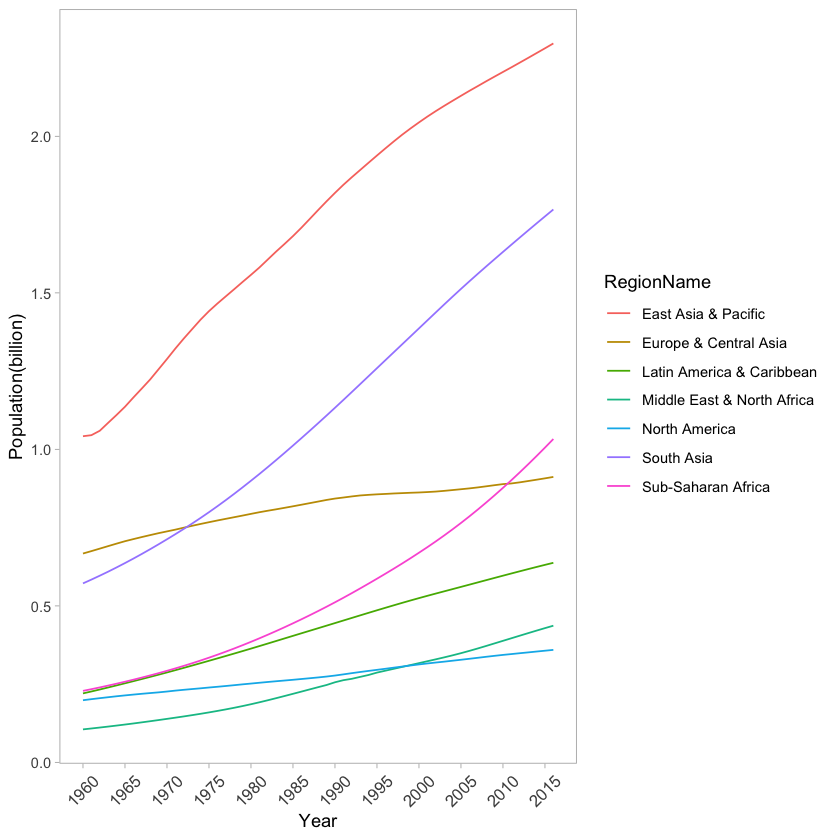

In [41]:
plot_for_population

In [42]:
ggsave(plot_for_population,filename = "Plot for population.jpg",width = 12,height = 9)